<a href="https://colab.research.google.com/github/sibrajas/datasets/blob/master/tomAndJerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
import numpy as np
from skimage.transform import resize

In [0]:
#import os
#os.getcwd()
#os.mkdir("/content/tomandjerry")

In [0]:
#os.chdir("/content/tomandjerry")

In [0]:
#! git clone https://github.com/sibrajas/datasets.git
#os.chdir('datasets')
#! git pull
#os.chdir('..')

In [86]:
count = 0
videoFile = "datasets/TomAndJerry.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
        #print(filename)
cap.release()
print ("Done!"+str(count))

Done!298


In [87]:

count = 0
videoFile = "datasets/TomAndJerryTest.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
        #print(filename)
cap.release()
print ("Done!"+str(count))

Done!186


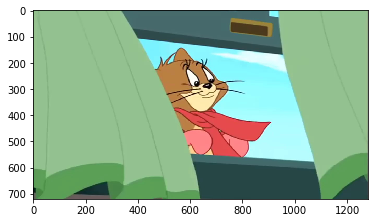

In [89]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)


In [0]:
data = pd.read_csv('datasets/mapping.csv')
test = pd.read_csv('datasets/testing.csv')

In [0]:
X = []
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)
X = np.array(X)

In [0]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [0]:
from keras.utils import np_utils
train_y = np_utils.to_categorical(data.Class)
test_y = np_utils.to_categorical(test.Class)

In [0]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
    image.append(a)
X = np.array(image)

In [0]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [0]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')
test_image = preprocess_input(test_image, mode='tf')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)


from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [0]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
test_image = base_model.predict(test_image)

In [0]:
X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)
test_image = test_image.reshape(186, 7*7*512)
train = X_train/X_train.max()
X_valid = X_valid/X_train.max()
test_image = test_image/test_image.max()

In [0]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid'))   # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=512, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=256, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(3, activation='softmax'))            # output layer

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
class_weights = compute_class_weight('balanced',np.unique(data.Class), data.Class)  # computing weights of different classes

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]      # model check pointing based on validation loss

In [110]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid), class_weight=class_weights, callbacks=callbacks_list)

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 4s 17ms/step - loss: 1.3890 - acc: 0.3654 - val_loss: 1.3118 - val_acc: 0.3667

Epoch 00001: val_loss improved from inf to 1.31178, saving model to weights.best.hdf5
Epoch 2/100
208/208 [==============================] - 3s 13ms/step - loss: 1.1887 - acc: 0.4279 - val_loss: 1.0759 - val_acc: 0.3889

Epoch 00002: val_loss improved from 1.31178 to 1.07591, saving model to weights.best.hdf5
Epoch 3/100
208/208 [==============================] - 3s 13ms/step - loss: 1.1709 - acc: 0.4087 - val_loss: 1.0138 - val_acc: 0.5333

Epoch 00003: val_loss improved from 1.07591 to 1.01383, saving model to weights.best.hdf5
Epoch 4/100
208/208 [==============================] - 3s 13ms/step - loss: 1.0853 - acc: 0.4856 - val_loss: 0.9841 - val_acc: 0.5778

Epoch 00004: val_loss improved from 1.01383 to 0.98406, saving model to weights.best.hdf5
Epoch 5/100
208/208 [==============================] - 3s 1

In [0]:
model.load_weights("weights.best.hdf5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
test_y = np_utils.to_categorical(test.Class)
scores = model.evaluate(test_image, test_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

186/186 [==============================] - 1s 3ms/step
acc: 65.05%
